In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# New semi-hierarchical clustering algorithm based on Leiden/Louvain unsupervised graph clustering techniques
# Compute the "isovist graph" based on the visible pixels of each pixel
# Cluster this graph using Leiden algorithm
# Display the clustering using the same method from openness_diagrams.py
# Q: Does this produce better clusterings?
# Q: Are there reasonable weights that could be added to the graph?

In [4]:
import igraph

In [5]:
import sys
sys.path.append("../..")

In [6]:
from rom_tools.rom_manager import RomManager

In [7]:
rom_m = RomManager("../../../roms/sm_guinea_pig.smc", "../../../roms/sm_newlevel.smc")

In [8]:
# 7A788 - Cathedral
# 7ACB3 - Bubble Mountain

# Green Brinstar Elevator
# Beetoms Room (should be one cluster)
# West Ocean?
# Morph Ball Room
# Wrecked Ship main room
# Pre-Spazer
# Green Brinstar Reserve

In [9]:
from rom_tools import graphics

In [10]:
tileset_table = graphics.get_tileset_table(rom_m)
cre_tile_sheet = graphics.get_cre_tilesheet(rom_m)
cre_tile_table = graphics.get_cre_tile_table(rom_m)

In [11]:
objnames = rom_m.parse()

In [12]:
lb = objnames["room_header_0x7acb3"].state_chooser.default.level_data.level_bytes

In [13]:
from world_rando.coord import *

In [14]:
def default(state):
    return state.state_chooser.default

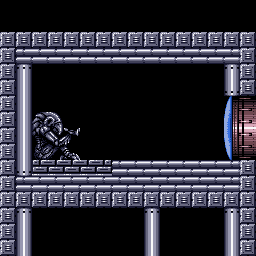

In [15]:
limage = graphics.image_from_state(default(objnames["room_header_0x7a107"]), rom_m)
# Gross PIL stuff
limage2 = limage.convert("RGB")
limage2

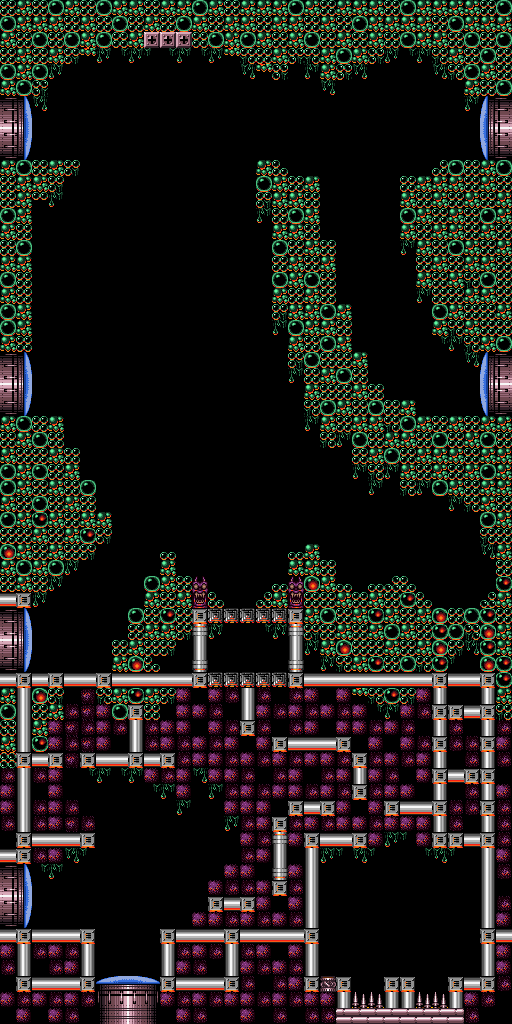

In [16]:
limage = graphics.image_from_state(default(objnames["room_header_0x7acb3"]), rom_m)
# Gross PIL stuff
limage2 = limage.convert("RGB")
limage2

In [17]:
level_array = objnames["room_header_0x7acb3"].state_chooser.default.level_data.level_array.layer1

In [18]:
import numpy as np

In [19]:
from world_rando.isovision import *

In [20]:
is_air = mk_is_air(level_array)

In [21]:
visibles = mk_visibles(is_air)
# coord : set(coord)

In [22]:
# Make the graph

In [77]:
# Coord IDs
coord_ids = {k: i for i,k in enumerate(visibles)}

In [78]:
g = igraph.Graph(len(visibles))
edges = []
for k1,v in visibles.items():
    for k2 in v:
        k1id = coord_ids[k1]
        k2id = coord_ids[k2]
        edges.append((k1id, k2id))
g.add_edges(edges)

In [79]:
directions = [up, down, left, right]

In [80]:
# Adjacency graph
# Adjacency graph produces terrible clusterings
# edges = []
# g = igraph.Graph(len(visibles))
# for k1 in iter2d(is_air):
#     for d in directions:
#         k1d = k1 + d
#         if not inbounds(k1d, is_air):
#             continue
#         if is_air[k1] == is_air[k1d]:
#             k1id = coord_ids[k1]
#             k2id = coord_ids[k1d]
#             edges.append((k1id, k2id))
# g.add_edges(edges)

In [81]:
# Make the clustering

In [82]:
import leidenalg

In [83]:
#partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
partition = leidenalg.find_partition(g, leidenalg.CPMVertexPartition, resolution_parameter=0.4)
#partition = leidenalg.find_partition(g, leidenalg.RBConfigurationVertexPartition, resolution_parameter=1.1)
#partition = leidenalg.find_partition(g, leidenalg.RBERVertexPartition, resolution_parameter=1.0)
#partition = leidenalg.find_partition(g, leidenalg.SignificanceVertexPartition)
#partition = leidenalg.find_partition(g, leidenalg.SurpriseVertexPartition)

In [84]:
len(partition._membership)

2048

In [85]:
# Plot the partition

In [86]:
class_array = np.zeros_like(level_array, dtype="uint16")
for k, i in coord_ids.items():
    class_array[k] = partition._membership[i]

In [87]:
class_array[(30, 17)]

9

In [88]:
class_array.shape

(32, 64)

In [89]:
class_array.dtype

dtype('uint16')

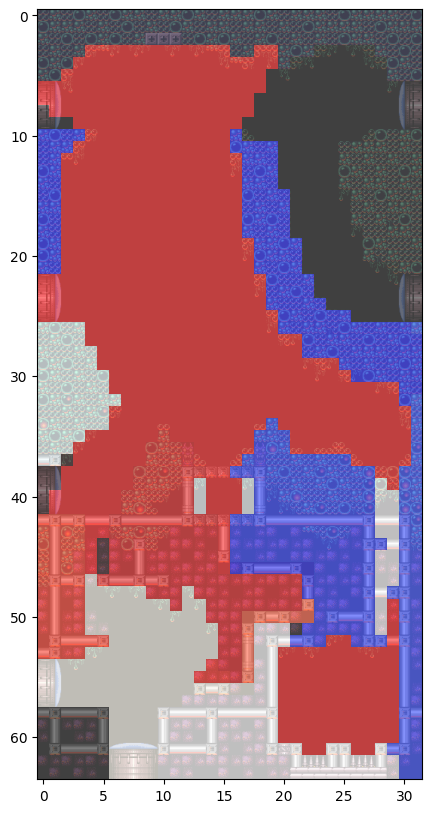

In [90]:
figsize(10,10)
# Why do we need these 0.5s? Thanks matplotlib
plt.imshow(limage2, alpha=0.5, extent=(-0.5, is_air.shape[0] -0.5, is_air.shape[1] -0.5, -0.5))
#plt.imshow(class_array.T, alpha=0.5, cmap="gist_rainbow")
plt.imshow(class_array.T, alpha=0.5, cmap="flag")
#plt.imshow(mk_class_array(ssds, cluster_state).T, alpha=0.5, cmap="flag")
#plt.imshow(mk_class_array(openness_1, clusters).T, alpha=0.5, cmap="prism")
plt.show()

In [37]:
# TODO: Green Hill Zone
# TODO: inversely-proportional distance edge weights?
# TODO: openness similarity edge weights? 1/(|o1 - o2|)?
# TODO: Jaccard similary for edge weights?
# TODO: positional orientation bias

In [38]:
# 79E52 - Green_Hill_Zone
ghz_state = objnames["room_header_0x79e52"].state_chooser.default
ghz_array = objnames["room_header_0x79e52"].state_chooser.default.level_data.level_array.layer1

In [39]:
ghz_is_air = mk_is_air(ghz_array)

In [40]:
ghz_visibles = mk_visibles(ghz_is_air)

In [41]:
ghz_coord_ids = {k: i for i,k in enumerate(iter2d(ghz_is_air))}

In [64]:
g = igraph.Graph(len(ghz_visibles))
edges = []
for k1,v in ghz_visibles.items():
    for k2 in v:
        k1id = ghz_coord_ids[k1]
        k2id = ghz_coord_ids[k2]
        edges.append((k1id, k2id))
g.add_edges(edges)

In [65]:
partition = leidenalg.find_partition(g, leidenalg.CPMVertexPartition, resolution_parameter=0.4)
#partition = leidenalg.find_partition(g, leidenalg.SignificanceVertexPartition)

In [66]:
len(partition._membership)

8192

In [67]:
class_array = np.zeros_like(ghz_array, dtype="uint16")
for k, i in ghz_coord_ids.items():
    class_array[k] = partition._membership[i]

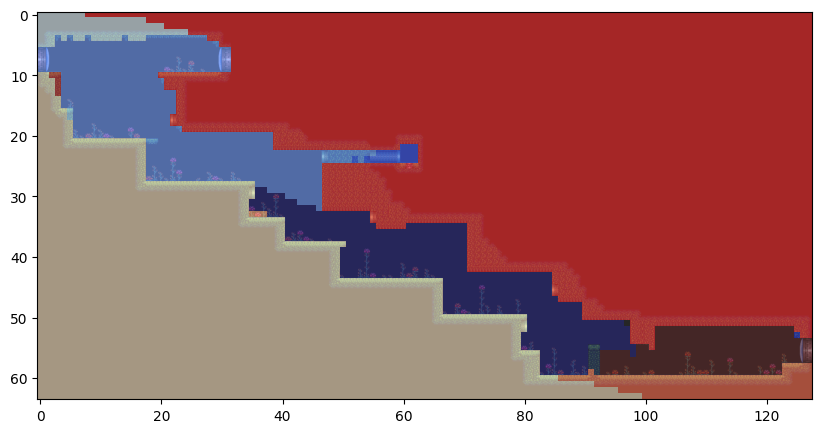

In [68]:
plt.imshow(graphics.image_from_state(ghz_state, rom_m), alpha=0.7, extent=(-0.5, ghz_array.shape[0] -0.5, ghz_array.shape[1] -0.5, -0.5))
#plt.imshow(class_array.T, alpha=0.5, cmap="rainbow")
plt.imshow(class_array.T, alpha=0.5, cmap="flag")
plt.show()